In [1]:
import pyvisa, time
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
rm = pyvisa.ResourceManager()
inst = rm.open_resource('ASRL4::INSTR', read_termination='\r', write_termination="\n", timeout=10000)


In [3]:
print(inst.query("*IDN?"))

KEITHLEY INSTRUMENTS INC.,MODEL 6487,4475696,B04   Jul 24 2017 15:26:56/A02  /C/J


In [4]:
def take_iv_sweep(start_volt, stop_volt, step_volt):
    delay = 0.5
    
    nsteps = int((stop_volt-start_volt)/step_volt)

    inst.write("*RST")
    inst.write("SOUR:VOLT:SWE:STAR %.3f"%start_volt)
    inst.write("SOUR:VOLT:SWE:STOP %.3f"%stop_volt)
    inst.write("SOUR:VOLT:SWE:STEP %.3f"%step_volt)
    inst.write("SOUR:VOLT:SWE:DEL %.2f"%delay)
    inst.write("ARM:COUN INF")
    inst.write("FORM:ELEM READ,VSO")
    inst.write("SOUR:VOLT:SWE:INIT")
    inst.write("SYST:ZCH OFF")
    inst.write(":INIT")

    time.sleep((delay + 0.5)*nsteps + 2)

    inst.write(":ABORT")
    inst.write(":TRAC:DATA?")

    data = inst.read()


    dvals = data.split(",")
    out_data = []
    for j in range(int(len(dvals)/2)):
        out_data.append([float(dvals[j*2 + 1]), float(dvals[j*2])])

    out_data = np.array(out_data)

    return(out_data)

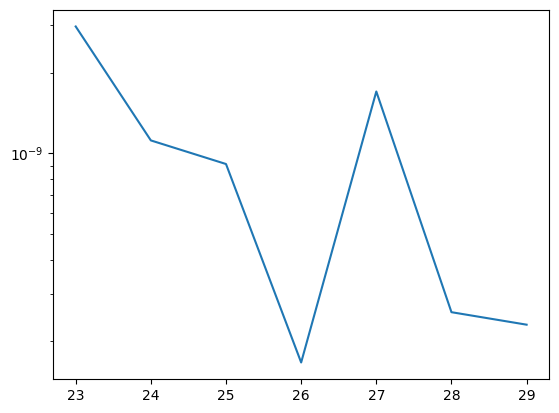

In [5]:
save_path = "D:/data/SiPM/IV_curves/"
save_name = "test"

data = take_iv_sweep(23, 29, 1)

if(save_path):
    cdate=datetime.today().strftime(r'%Y%m%d')
    np.savetxt(save_path+"%s_%s.csv"%(cdate,save_name), data, delimiter=',')

plt.figure()
plt.semilogy(data[:,0], np.abs(data[:,1]))

plt.show()

6

In [6]:

inst.write(":ABORT")
inst.write(":TRAC:DATA?")
time.sleep(0.1)
data = inst.read()
print(data)

+7.363509E-12,+000.0000,+2.175404E-10,+000.2000,+3.172813E-10,+000.4000,+3.865950E-10,+000.6000,+4.592486E-10,+000.8000,+5.161256E-10,+001.0000
